C:\Users\derek\AppData\Local\Temp\ipykernel_23224\229140563.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed


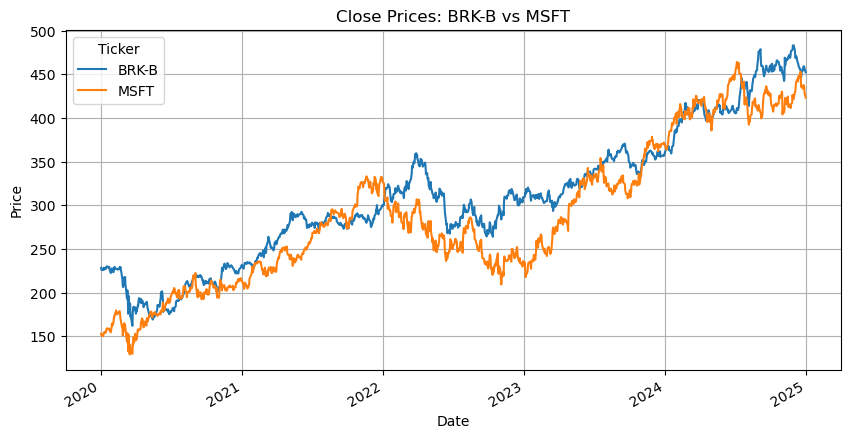

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# define tickers and time frame
tickers = ['BRK-B', 'MSFT']
start_date = '2020-01-01'
end_date = '2024-12-31'

# close prices for stocks
data = yf.download(tickers, start=start_date, end=end_date)['Close']
data.dropna(inplace=True)

# plot prices
data.plot(title="Close Prices: BRK-B vs MSFT", figsize=(10, 5))
plt.ylabel("Price")
plt.xlabel("Date")
plt.grid()
plt.show()

# save to CSV
data.to_csv('../data/brkb_msft_prices.csv')


In [47]:
from statsmodels.tsa.stattools import coint

# Cointegration test: determining if spread between two assets are constant
# Null hypothesis: spread is non-stationary
score, pvalue, _ = coint(data['BRK-B'], data['MSFT'])

# We want a p val < 0.05 ideally, which means conintegration exists
print(f"Cointegration p-value: {pvalue:.4f}")


Cointegration p-value: 0.1096


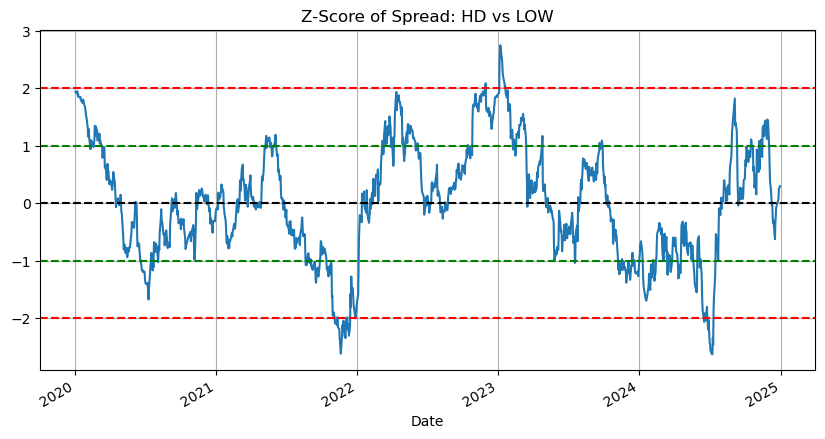

In [48]:
# Spread = HD - beta * LOW (regression hedge ratio)
beta = np.polyfit(data['BRK-B'], data['MSFT'], 1)[0]
spread = data['BRK-B'] - beta * data['MSFT']

z_score = (spread - spread.mean()) / spread.std()

# Plot Z-score
plt.figure(figsize=(10, 5))
z_score.plot()

plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='green', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(2, color='red', linestyle='--')
plt.axhline(-2, color='red', linestyle='--')
plt.title("Z-Score of Spread: HD vs LOW")
plt.grid()
plt.show()
